# Can neural networks learn logical operators?

The simple answer is, yes, they can. Since all computing comes down to a combination of locigal operators, neural networks can emulate all computing. The efficiency is about the same as of those monkeys writing Shakespeare. The design of deep learning guides the process.

## Import modules

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

## Define logical operators

In [2]:
def OR(v1,v2):
    if not (v1.all() in (0,1) and v2.all() in (0,1)):
        raise ValueError("Input 0 or 1")
    return v1 | v2
def AND(v1,v2):
    if not (v1.all() in (0,1) and v2.all() in (0,1)):
        raise ValueError("Input 0 or 1")
    return v1 & v2
def NAND(v1,v2):
    if not (v1.all() in (0,1) and v2.all() in (0,1)):
        raise ValueError("Input 0 or 1")
    return ~(v1 & v2)+2
def XOR(v1,v2):
    if not (v1.all() in (0,1) and v2.all() in (0,1)):
        raise ValueError("Input 0 or 1")
    return AND(OR(v1,v2),NAND(v1,v2)) 

### Display as dataframe
Each row is a sample, each column a feature.

In [3]:
v1 = np.array([0,0,1,1]).astype(np.uint8).reshape(-1,1)
v2 = np.array([0,1,0,1]).astype(np.uint8).reshape(-1,1)
data = np.hstack((v1, v2, OR(v1,v2), AND(v1,v2), NAND(v1,v2), XOR(v1,v2)))
df = pandas.DataFrame(data)
df.columns = ['v1', 'v2', 'OR', 'AND', 'NAND', 'XOR']
df.index = ['' ,'', '', '']
print(df)

  v1  v2  OR  AND  NAND  XOR
   0   0   0    0     1    0
   0   1   1    0     1    1
   1   0   1    0     1    1
   1   1   1    1     0    0


## Activation function
### Logistic sigmoid
The logistic sigmoid function is defined as
\begin{equation}
y = h(x) = \frac{1}{1+\exp(-x)} = \frac{\exp(x)}{\exp(x) +1}
\end{equation}
The derivative is
\begin{equation}
h'(x) = \frac{\exp(x)}{(\exp(x) +1)^2} = h(x) (1 - h(x)) = y(1-y)
\end{equation}
This will be used as activation function. The interpretation is that the neuron fires for positive values, but does not react for negative values. Around zero is a transition zone between the two states. The size of the transition zone can be changed by multiplying $x$ by a positive number. The larger this number the faster the transition. 

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(y):
    return y * (1 - y)

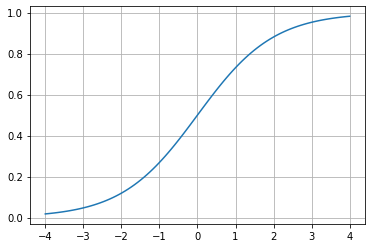

In [5]:
x = np.linspace(-4,4,100)
y = sigmoid(x)
fig = plt.figure()
plt.plot(x,y)
plt.grid(True)
plt.show()

## Simple Neural Network class
We illustrate this with a simple two layer neural network with two input neurons and one output neuron and two neurons in the set of hidden neurons. The bias is incorporated in dummy neurons which always have the value 1.

### Forward propagation
![alt text](Forward.png "Forward propagation")

The activations of the hidden neurons are calculated as
\begin{equation}
\left( \begin{array}{c} a_1 \\ a_2 \end{array} \right) = \left( \begin{array}{ccc} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{array} \right) \left( \begin{array}{c} x_1 \\ x_2 \\ 1 \end{array} \right).
\end{equation}
The latent variables in the hidden neurons are then
\begin{equation}
\left( \begin{array}{c} z_1 \\ z_2 \end{array} \right) = \left( \begin{array}{c} h(a_1) \\ h(a_2) \end{array} \right)
\end{equation}
The activation of the output neuron is
\begin{equation}
a = \left( \begin{array}{ccc} w_1 & w_2 & w_3 \end{array} \right) \left( \begin{array}{c} z_1 \\ z_2 \\ 1 \end{array} \right)
\end{equation}
and the output is calculated as $y = h(a)$.

### Training
The prediction error is $\delta = y-t$, where $t$ is the target. Training consists of minimizing a cost function $E$ which is calculated across all training data. Algorithmically, this minimization becomes the same for standard tasks (classification and regression) when the standard cost functions are used. (Note: care has to be taken when cost functions are modified). The negative gradient (derivative with respect to all weights) at a point on the cost function points in the direction of steepest descent. The minimization is performed by taking a step in this direction and adjusting the weights by this step. The step size is given by the learning rate $\eta$, too small and the convergence is slow, too large and we might overshoot the minimum.

### Backward error propagation
![alt text](Backward.png "Backward error propagation")

The error is $\delta$ gets propagated back to the hidden neurons by
\begin{equation}
\left( \begin{array}{c} \delta_1 \\ \delta_2 \end{array} \right) = \delta \left( \begin{array}{c} h'(a_1) w_1 \\ h'(a_2) w_2 \end{array} \right).
\end{equation}

The derivatives of $E$ with respect to the weights are
\begin{equation}
\left( \begin{array}{ccc} \frac{\partial}{\partial w_1} & \frac{\partial}{\partial w_2} & \frac{\partial}{\partial w_3} \end{array} \right) E = \delta \left( \begin{array}{ccc} z_1 & z_2 & 1 \end{array} \right)
\end{equation}
and 
\begin{equation}
\left(\begin{array}{ccc} \frac{\partial}{\partial w_{11}} & \frac{\partial}{\partial w_{12}} & \frac{\partial}{\partial w_{13}} \\ \frac{\partial}{\partial w_{21}} & \frac{\partial}{\partial w_{22}} & \frac{\partial}{\partial w_{23}} \end{array} \right) E = \left( \begin{array}{c} \delta_1 \\ \delta_2 \end{array} \right) \left( \begin{array}{ccc} x_1 & x_2 & 1 \end{array} \right).
\end{equation}

After seeing one training sample, the weights are updated by
\begin{equation}
\left( \begin{array}{ccc} w_1 & w_2 & w_3 \end{array} \right) = \left( \begin{array}{ccc} w_1 & w_2 & w_3 \end{array} \right) -  \eta \delta \left( \begin{array}{ccc} z_1 & z_2 & 1 \end{array} \right)
\end{equation}
and
\begin{equation}
\left( \begin{array}{ccc} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{array} \right) = \left( \begin{array}{ccc} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{array} \right) -  \eta \left( \begin{array}{c} \delta_1 \\ \delta_2 \end{array} \right) \left( \begin{array}{ccc} x_1 & x_2 & 1 \end{array} \right).
\end{equation}

Using one training sample at a time, is known as *online* or *sequential* learning. Updating in one step using several training samples is known as *batch* or *mini-batch* methods.

In [6]:
class NeuralNetwork:
    
    def __init__(self,
                 nin,     # number of input neurons
                 nout,    # number of output neurons
                 nhidden, # number of hidden neurons
                 tol,     #tolerance
                 nepoch,  # number of epochs
                 rate):   # learning rate
        self.nin = nin
        self.nout = nout
        self.nhidden = nhidden
        self.tol = tol
        self.nepoch = nepoch
        self.rate = rate 
        self.init_weights()
        
    def init_weights(self):  # He et al.(2015) initialization
        # + 1 is the bias neuron
        self.weights_in = np.random.randn(self.nhidden, self.nin+1) * np.sqrt(2/self.nin)
        self.weights_out = np.random.randn(self.nout, self.nhidden+1) * np.sqrt(2/self.nhidden)
        
    def predict(self, X): # X row vectors
        # Append bias and multiply with weights.
        Y = self.weights_in @ np.append(X.T,np.ones((1,X.shape[0])), axis = 0)
        # Apply activation function.
        Y = sigmoid(Y)
        # Append bias and multiply with weights.
        Y = self.weights_out @ np.append(Y,np.ones((1,Y.shape[1])), axis =0)
        # Apply activation function.
        Y = sigmoid(Y)
        return Y.T
    
    def train(self, X, target):
        # Permute the training data.
        perm = np.random.permutation(X.shape[0])
        # Append bias, multiply with weights and apply activation function.
        Z = sigmoid(self.weights_in @ np.append(X[perm,:].T,np.ones((1,X.shape[0])), axis = 0))
        Y = sigmoid(self.weights_out @ np.append(Z,np.ones((1,Z.shape[1])), axis =0))
        # Errors for all training samples.
        Y_errors = Y - target[perm].T
        cost = 0.5 * np.sum(Y_errors**2)
        epoch = 0
        while cost > self.tol and epoch < self.nepoch:
            epoch = epoch+1
            # Propagate errors. 
            # Note first multiplication componentwise, second matrix multiplication.
            # Using special property of sigmoid derivative.
            Z_errors = sigmoid_derivative(Z) * (self.weights_out[:,:-1].T @ Y_errors)
            # Update weights in second layer.
            self.weights_out = self.weights_out - self.rate * Y_errors @ np.append(Z,np.ones((1,Z.shape[1])), axis =0).T
            # Update weights in first layer.
            self.weights_in = self.weights_in - self.rate * Z_errors @ np.append(X[perm,:],np.ones((X.shape[0],1)), axis = 1)
            # Permute the training data.
            perm = np.random.permutation(X.shape[0])
            # Append bias, multiply with weights and apply activation function.
            Z = sigmoid(self.weights_in @ np.append(X[perm,:].T,np.ones((1,X.shape[0])), axis = 0))
            Y = sigmoid(self.weights_out @ np.append(Z,np.ones((1,Z.shape[1])), axis =0))
            # Errors for all training samples.
            Y_errors = Y - target[perm].T
            cost = 0.5 * np.sum(Y_errors**2)
        return epoch

## Learning logical operators
Choose one of the last four columns as target. A lot more epochs are necessary, to learn XOR. This is because, it is a combination of other logical operators. The other logical operators can actually be learned by an even simpler neural network consisting of only one layer, two input and one output neurons and **no** hidden neurons (left as exercise), because they only need to separate one region from another. XOR needs two layers, because it needs to separate three regions.

In [8]:
X = data[:,0:2]
target = data[:,-1]
NN = NeuralNetwork(nin=2, nout=1, nhidden=2, tol = 0.1, nepoch=100, rate=1)
print('Output before training:')
print(NN.predict(X))
print('Epochs until convergence:', NN.train(X,target))
print('Output after training rounded to the nearest integer:')
print(np.round(NN.predict(X)).astype(np.uint8))

Output before training:
[[0.55974865]
 [0.54119159]
 [0.52095599]
 [0.51093086]]
Epochs until convergence: 98
Output after training rounded to the nearest integer:
[[0]
 [1]
 [1]
 [0]]
